# Make Plot to show PRAP1 proteomic and transcriptomic abundance in Colon Cancer when FSIP2 is Mutated

#### Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns

import cptac
import cptac.algorithms as al

ov = cptac.Colon()

/anaconda3/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


### Specify Mutation Gene and Omics Gene

In [2]:
mutation_gene = 'FSIP2'
omics_protein = 'PRAP1'

### Get Proteomics Data

In [3]:
proteomics = ov.join_omics_to_mutations(omics_df_name='proteomics', omics_genes=omics_protein, mutations_genes= mutation_gene)
proteomics = proteomics[proteomics['Sample_Status'] == 'Tumor']

### Get Transcriptomics Data

In [4]:
transcriptomics = ov.join_omics_to_mutations(omics_df_name='transcriptomics', omics_genes=omics_protein, mutations_genes=mutation_gene)
transcriptomics = transcriptomics[transcriptomics['Sample_Status'] == 'Tumor']

### Make Pandas Dataframe to Plot

In [5]:
plotdf = pd.DataFrame(columns=['Value','Omics','Mutated'])
for ind, row in proteomics.iterrows():
    if row[mutation_gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        plotdf = plotdf.append({'Value':row[omics_protein + '_proteomics'], 'Omics': 'proteomics', 'Mutated': 'Mutated'}, ignore_index = True)
    else:
        plotdf = plotdf.append({'Value':row[omics_protein + '_proteomics'], 'Omics': 'proteomics', 'Mutated': 'Wildtype'}, ignore_index =True)
        
        
        
for ind, row in transcriptomics.iterrows():
    if row[mutation_gene + '_Mutation_Status'] != 'Wildtype_Tumor':
        plotdf = plotdf.append({'Value':row[omics_protein + '_transcriptomics'], 'Omics': 'transcriptomics', 'Mutated': 'Mutated'}, ignore_index = True)
    else:
        plotdf = plotdf.append({'Value':row[omics_protein + '_transcriptomics'], 'Omics': 'transcriptomics', 'Mutated': 'Wildtype'}, ignore_index =True)

### Generate plot

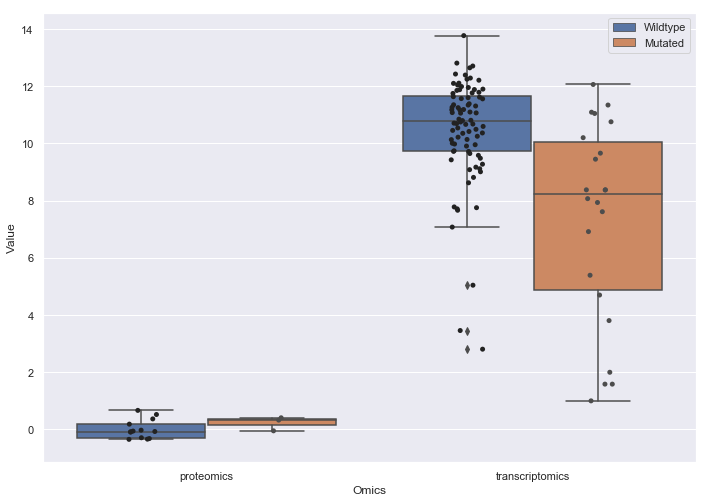

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt = sns.boxplot(data=plotdf, x = 'Omics', y = 'Value', hue='Mutated')
plt = sns.stripplot(data=plotdf, x = 'Omics', y = 'Value', hue='Mutated', jitter = True, dodge=True, color='.3')


handles, labels = plt.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2])